In [11]:
'''일반인 데이터 프레임 불러오기'''

import pandas as pd

ij = pd.read_csv('data/고위험음주율_추이_20250126064041.csv', encoding = 'cp949')
ij

,성별(1),특성별(1),특성별(2),2020,2020.1,2021,2021.1,2022,2022.1
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),응답자수 (명),분율 (%),응답자수 (명),분율 (%)
1,전체,연령별1,30-39세,766,16.6,646,15.6,664,14.9
2,전체,연령별1,40-49세,965,19.0,955,16.3,861,18.1
3,전체,연령별1,50-59세,1060,13.9,1027,13.8,917,17.2
4,전체,연령별1,60-69세,1113,10.9,1107,9.1,1122,10.6
5,전체,연령별1,70세이상,1158,3.5,1225,3.7,1080,4.4


In [12]:
'''데이터 전처리'''

# 1. 첫 번째 행 제거 (헤더 설명 행 제거)
ij = ij.iloc[1:]

# 2. 컬럼명 변경 (명확한 구분을 위해)
ij.columns = [
    '성별', '특성1', '특성2',
    '2020_응답자수', '2020_분율',
    '2021_응답자수', '2021_분율',
    '2022_응답자수', '2022_분율'
]

# 3. 숫자 데이터로 변환 (쉼표 제거 후 숫자로 변환)
numeric_cols = [col for col in ij.columns if '응답자수' in col or '분율' in col]
for col in numeric_cols:
    ij[col] = ij[col].str.replace(',', '')  # 쉼표 제거
    ij[col] = pd.to_numeric(ij[col], errors='coerce')  # 숫자로 변환

# 4. 2020~2022년도 데이터의 응답자수 합산 및 분율 가중평균 계산
weighted_mean_percentages = {}
for year in ['2020', '2021', '2022']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_분율'
    
    # 가중평균 계산
    weighted_mean_percentages[year] = (
        (ij[respondents_col] * ij[percentage_col]).sum() /
        ij[respondents_col].sum()
    )

# 5. 결과 데이터프레임 생성
ij_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [ij[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 6. 소수점 둘째 자리로 제한
ij_j['분율 가중평균'] = ij_j['분율 가중평균'].round(2)

# 결과 확인
ij_j


,연도,응답자수 합산,분율 가중평균
0,2020,5062,12.24
1,2021,4960,10.97
2,2022,4644,12.47


In [26]:
'''당뇨환자 데이터프레임 불러오기'''

import pandas as pd

dj = pd.read_csv('data/시·도별_당뇨병_진단_경험자_30세_이상_의_고위험음주율_20250126065058.csv', encoding = 'cp949')
dj

,시도별(1),2020,2020.1,2021,2021.1,2022,2022.1
0,시도별(1),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%)
1,서울특별시,2286,7.9,2243,7.9,2596,10.2
2,부산광역시,1602,9.8,1713,8.1,1881,11.7
3,대구광역시,732,7.2,785,8.8,879,9.5
4,인천광역시,1053,9.7,1145,14.5,1228,12.9
5,광주광역시,422,9.8,444,9.5,500,11.1
6,대전광역시,400,8.6,473,6.2,520,6.0
7,울산광역시,431,10.8,445,8.1,462,13.1
8,세종특별자치시,85,8.7,68,4.6,70,7.0
9,경기도,4057,8.8,4294,9.6,4930,11.2


In [33]:
'''데이터 전처리'''

# 2. 컬럼명 변경
dj.columns = [
    '시도별', '2020_응답자수', '2020_분율',
    '2021_응답자수', '2021_분율',
    '2022_응답자수', '2022_분율'
]

# 3. 숫자 데이터로 변환 (쉼표 제거 후 숫자로 변환)
numeric_cols = [col for col in dj.columns if '응답자수' in col or '분율' in col]
for col in numeric_cols:
    dj[col] = dj[col].astype(str).str.replace(',', '')  # 문자열로 변환 후 쉼표 제거
    dj[col] = pd.to_numeric(dj[col], errors='coerce')  # 숫자로 변환

# 4. 연도별 응답자수 합산 및 분율 가중평균 계산
weighted_mean_percentages = {}
for year in ['2020', '2021', '2022']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_분율'
    
    # 가중평균 계산
    weighted_mean_percentages[year] = (
        (dj[respondents_col] * dj[percentage_col]).sum() /
        dj[respondents_col].sum()
    )

# 5. 결과 데이터프레임 생성
dj_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [dj[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 6. 소수점 둘째 자리로 제한
dj_j['분율 가중평균'] = dj_j['분율 가중평균'].round(2)

# 결과 확인
dj_j

,연도,응답자수 합산,분율 가중평균
0,2020,26716.0,9.35
1,2021,28353.0,10.28
2,2022,30783.0,11.06


In [39]:
'''데이터 통합'''

import pandas as pd

# 데이터 병합
idj = pd.merge(ij_j, dj_j, on='연도', how='outer', suffixes=('_일반인', '_당뇨환자'))

# NaN 값을 0으로 대체 (필요 시)
idj.fillna(0, inplace=True)

# 결과 확인
print(idj)

     연도  응답자수 합산_일반인  분율 가중평균_일반인  응답자수 합산_당뇨환자  분율 가중평균_당뇨환자
0  2020         5062        12.24       26716.0          9.35
1  2021         4960        10.97       28353.0         10.28
2  2022         4644        12.47       30783.0         11.06


In [52]:
'''시각화'''

# 그래프를 PNG로 저장하는 함수
def save_bar_graph(idh, filename):
    plt.figure(figsize=(10, 9))
    bar_width = 0.35
    x = range(len(idh['연도']))
    
    # 일반인 음주율 막대
    bars1 = plt.bar([p - bar_width / 2 for p in x], idh['분율 가중평균_일반인'], 
                    width=bar_width, color='#4CAF50', label='일반인', alpha=0.8)
    
    # 당뇨환자 음주율 막대
    bars2 = plt.bar([p + bar_width / 2 for p in x], idh['분율 가중평균_당뇨환자'], 
                    width=bar_width, color='#FF5722', label='당뇨환자', alpha=0.8)
    
    # 각 막대 위에 값 표시
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    
    # 축, 제목 설정
    plt.xticks(x, idh['연도'], fontsize=12)
    plt.xlabel('연도', fontsize=14, fontweight='bold')
    plt.ylabel('음주율 (%)', fontsize=14, fontweight='bold')
    plt.title('일반인 vs 당뇨환자 고위험 음주율 비교', fontsize=16, fontweight='bold')
    
    # y축 최대값 조정
    plt.ylim(0, max(idh['분율 가중평균_일반인'].max(), idh['분율 가중평균_당뇨환자'].max()) + 2)
    
    # 범례를 그래프 아래로 이동
    plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # 그리드 및 레이아웃
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # 그래프 저장
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # 그래프 화면에 출력
    plt.show()



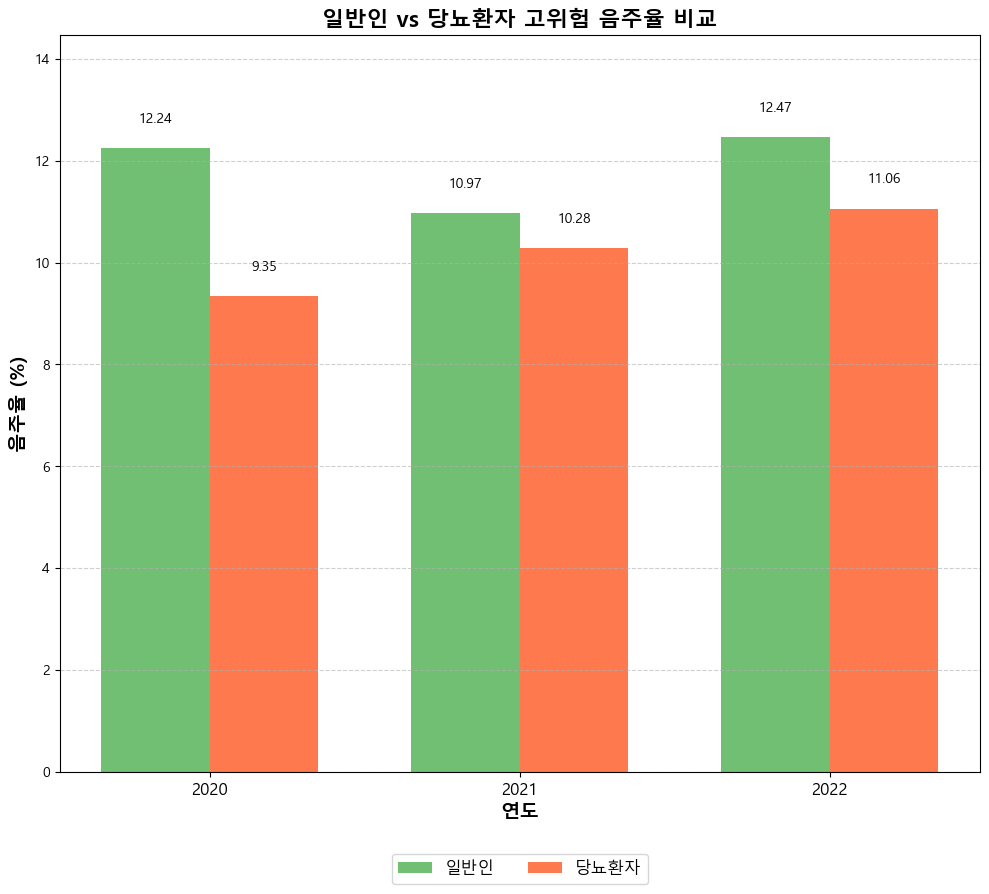

In [53]:
# 함수 실행 (예: 'drunk_rate_comparison.png'로 저장)
save_bar_graph(idh, 'drunk_rate_comparison.png')